# Pymaceuticals Inc.
---

### Analysis

- The information is not all valid because there were more trials done for certain drugs than others.
- The effectiveness of Capomulin seems to be comparable to Ramicane, more effective than others based on the information below.
- The less heavier the mouse, the more effective the drug is.
 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_metadata_df=pd.merge(mouse_metadata,study_results)
combined_mouse_metadata_df.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#set the 'Mouse ID' to be our index for easy referencing of rows
combined_mouse_metadata=combined_mouse_metadata_df.set_index("Mouse ID")

In [3]:
# Checking the number of mice.
number_of_mice_df=combined_mouse_metadata_df["Mouse ID"].nunique()
print("Number of Mice:", number_of_mice_df)

Number of Mice: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
number_of_mice_df=combined_mouse_metadata_df.groupby("Mouse ID") ["Timepoint"].nunique()
number_of_mice_df

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64

In [45]:
# Find the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_mouse_metadata_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Locate all the duplicated mice and return Mouse ID
duplicated_mice_ID = combined_mouse_metadata_df.loc[duplicated_mice, 'Mouse ID'].unique()


In [46]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_ID_data = combined_mouse_metadata_df.loc[combined_mouse_metadata_df['Mouse ID'] == duplicated_mice_ID[0]]
duplicated_mice_ID_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# Create a DataFrame by dropping the duplicate mouse by ID.
combined_data_drop = combined_mouse_metadata_df.drop_duplicates(subset="Mouse ID", keep="last")
# Checking the number of mice in the clean DataFrame.
print(number_of_mice_df)
combined_data_drop.head()

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mouse_metadata_drop=combined_mouse_metadata_df.drop_duplicates(subset="Mouse ID", keep="last")

In [6]:
# Checking the number of mice in the clean DataFrame.
print(number_of_mice_df)
combined_mouse_metadata_drop.head()

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = combined_mouse_metadata_drop.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
median_tumor = combined_mouse_metadata_drop.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
variance_tumor = combined_mouse_metadata_drop.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
std_tumor = combined_mouse_metadata_drop.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
sem_tumor = combined_mouse_metadata_drop.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]

summary_stats_table =pd.DataFrame({'Mean of Tumor Volume':mean_tumor,
                          'Median of Tumor Volume':median_tumor,
                          'Variance of Tumor Volume':variance_tumor,
                          'STD of Tumor Volume':std_tumor,
                          'SEM of Tumor Volume': sem_tumor})

summary_stats_table.round(2)

/var/folders/5g/96csl0h529z2pqx9_m5575sw0000gn/T/ipykernel_57949/615589496.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tumor = combined_mouse_metadata_drop.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
/var/folders/5g/96csl0h529z2pqx9_m5575sw0000gn/T/ipykernel_57949/615589496.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_tumor = combined_mouse_metadata_drop.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
/var/folders/5g/96csl0h529z2pqx9_m5575sw0000gn/T/ipykernel_57949/615589496.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is dep

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,STD of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,36.67,38.13,32.66,5.72,1.14
Ceftamin,57.75,59.85,69.98,8.37,1.67
Infubinol,58.18,60.17,74.01,8.60,1.72
Ketapril,62.81,64.49,98.92,9.95,1.99
Naftisol,61.21,63.28,106.03,10.30,2.06
Placebo,60.51,62.03,78.76,8.87,1.77
Propriva,56.74,55.84,69.35,8.33,1.67
Ramicane,36.19,36.56,32.17,5.67,1.13
Stelasyn,61.00,62.19,90.33,9.50,1.94


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugs_total= pd.DataFrame(pd.value_counts(combined_mouse_metadata_df["Drug Regimen"]))
drugs_total

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Infubinol,178
Ceftamin,178
Propriva,161


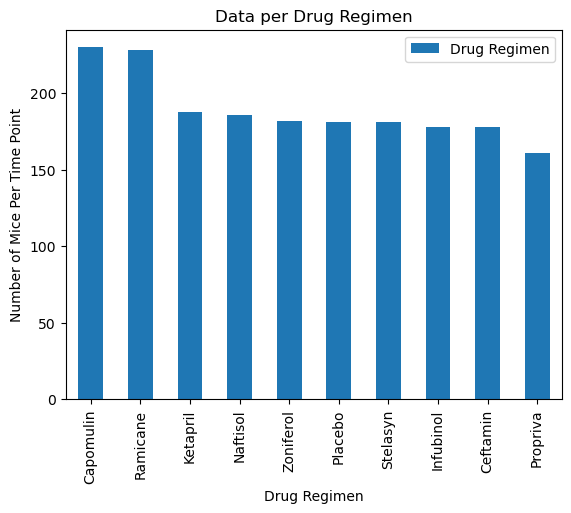

<Figure size 640x480 with 0 Axes>

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
%matplotlib inline
# pandas plot
drugs_total.plot(kind = "bar")
plt.title("Data per Drug Regimen")
plt.ylabel("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_number=pd.value_counts(combined_mouse_metadata_drop['Sex'])
gender_number

Male      125
Female    124
Name: Sex, dtype: int64

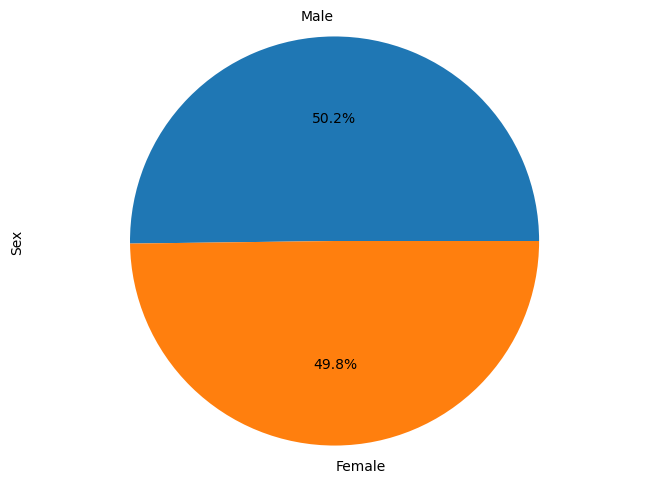

In [25]:
#pandas pie plot
gender_pandas = gender_number.plot(kind="pie", y="sex", autopct='%1.1f%%')
gender_pandas.set_ylabel("Sex")

plt.tight_layout()
plt.axis("equal")
plt.show()

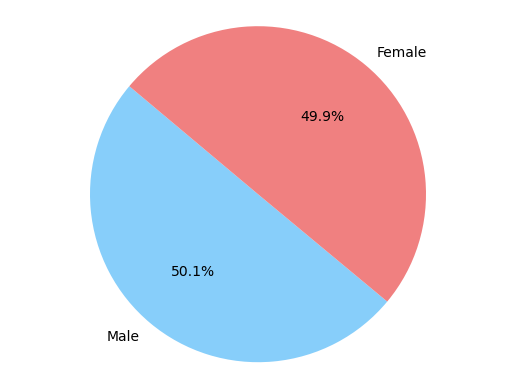

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = [325, 324]
plt.pie(
    sizes, 
    labels=["Male","Female"],          
    colors=["lightskyblue","lightcoral"],
    autopct='%1.1f%%',                                         # Formats percentages
    startangle=140
)

# Tells matplotlib we want a pie chart with equal= axes
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_vol = combined_mouse_metadata_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()


In [ ]:

# Start by getting the last (greatest) timepoint for each mouse
summary_stats_table_assort_df = summary_stats_table.sort_values("Mean of Tumor Volume", ascending=True)
summary_stats_table_assort_df

In [57]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []
# Get the Regimen drug data
Capomulin = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Capomulin"]
Ramicane = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Ramicane"]
Propriva = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Propriva"]
Ceftamin = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Ceftamin"]
x_axisC = Capomulin["Tumor Volume (mm3)"]
x_axisR = Ramicane["Tumor Volume (mm3)"]
x_axisP = Propriva["Tumor Volume (mm3)"]
x_axisCe = Ceftamin["Tumor Volume (mm3)"]
quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
mean = final_tumor_vol.mean()
iqr = upperq-lowerq    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    final_tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]

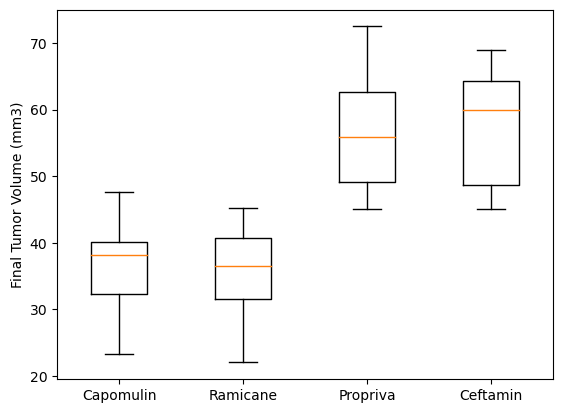

In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot([x_axisC, x_axisR, x_axisP, x_axisCe])
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(["Capomulin", "Ramicane", "Propriva", "Ceftamin"])
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

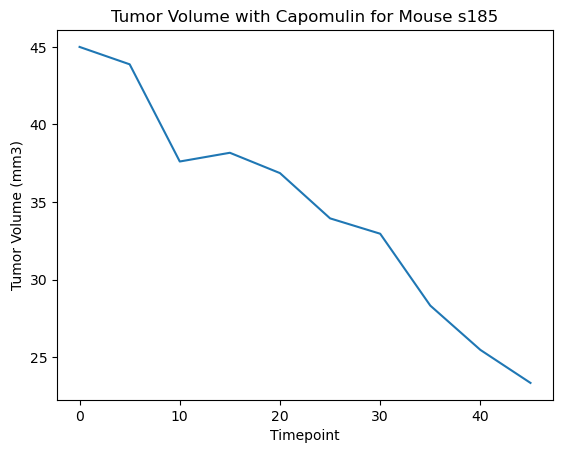

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis =combined_mouse_metadata_df.loc[combined_mouse_metadata_df["Mouse ID"]== "s185"]
x_axis = x_axis["Timepoint"]

y_axis =combined_mouse_metadata_df.loc[combined_mouse_metadata_df["Mouse ID"]== "s185"]
y_axis = y_axis["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Tumor Volume with Capomulin for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

In [31]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight_capomulin = combined_data_drop.loc[combined_data_drop["Drug Regimen"]== "Capomulin"]
mouse_weight_capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
64,f966,Capomulin,Male,16,17,20,30.485985,0
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
134,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,Capomulin,Female,3,19,45,33.329098,1
164,t565,Capomulin,Female,20,17,45,34.455298,0
204,i738,Capomulin,Female,23,20,45,37.311846,2


## Correlation and Regression

The correlation between mouse weight and tumor vol is -0.98
The r-squared is: 0.97


Text(20, 36, 'r-squared = 0.97')

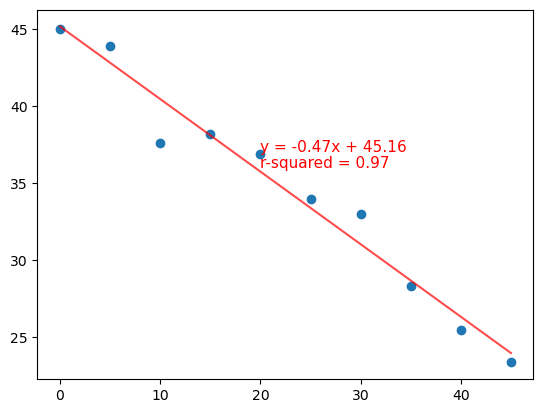

In [67]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Define x,y values
x_values = x_axis
y_values = y_axis

# Calculate the correlation
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and tumor vol is {correlation}")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = round(rvalue**2,2)
print(f"The r-squared is: {r_squared}")

# y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(line_eq,(20,37), fontsize=11, color="red")
plt.annotate(f'r-squared = {r_squared}', (20,36), fontsize=11, color="red")
